# **Processamento digital de imagens em Python com matemática**

## **Importando as bibliotecas**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
import math


## **Importando Imagem**

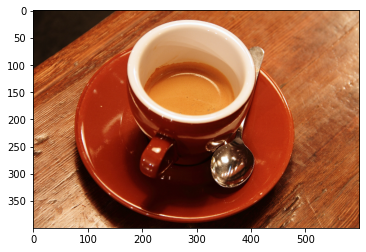

In [ ]:
image = data.coffee()
plt.imshow(image, cmap='gray')

## **Transformação para escala de cinza**

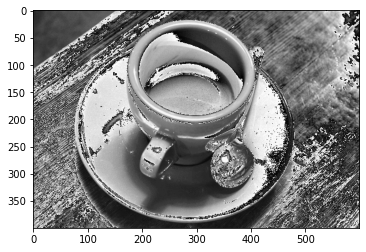

In [ ]:
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]
# o método ceil do numpy impede que os valores sejam contínuos na imagem.
gray_image = np.ceil((image_r + image_g + image_b) / 3)
plt.imshow(gray_image, cmap='gray')

## **Conversão para escala de cinza com novo método**

In [ ]:
def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]
    gray_image = np.ceil(np.dot(image[...,:3], params))
    
    # Saturando os valores em 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

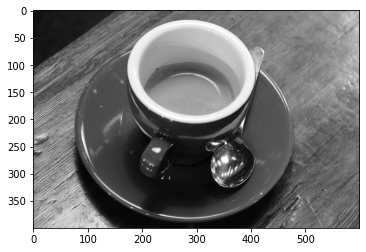

In [ ]:
gray_image = convert_to_gray(image, True)
plt.imshow(gray_image, cmap='gray')

## **Implementando as transformações geométricas**

**Definição**: 
> Dado um pixel em uma imagem bidimensional com um valor de intensidade entre 0 e 255 e nas coordenadas(X,Y) iremos utilizar fórmulas matemáticas para descobrir as novas coordenadas (X’,Y’) e o valor de intensidade do pixel na imagem que será gerada. 

Para criar esse rearranjo nos pixels podemos utilizar o mapeamento direto ou indireto.


*   O **mapeamento direto** consiste na varredura de cada um dos pixels da imagem de entrada e, para cada posição, calculamos sua localização correspondente na nova imagem gerada. 
*   O **mapeamento inverso** se baseia nos pixels da nova imagem que será gerada a partir da transformação, ou seja, para cada coordenada de pixel na imagem f2 utilizamos a fórmula matemática para buscar o valor de intensidade desse pixel em f1. 






A função genérica chamada **geometric_transformation** será utilizada como base, alterando apenas a fórmula matemática que é passada como parâmetro, o que faz total diferença no resultado final da imagem.


In [ ]:
def geometric_transformation(image, transform_f):
    new_image = np.zeros((image.shape[0], image.shape[1]))
   
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):   
            x,y = transform_f(row, column)
            
            try:
                if int(x) < 0 or int(y) < 0:
                    raise Exception
                new_image[row][column] = image[int(x)][int(y)]
            except:
                new_image[row][column] = 0
    return new_image

### **Translação**


> O efeito de **translação** pode ser entendido como o **ato** de “empurrar” ou **deslocar** a imagem pelo eixo X e/ou Y. Sua fórmula é definida por:




*   x’ = x + Tx
*   y’ = y + Ty





In [ ]:
def translate_image(row, column, dx=72.5, dy=32.3):
    x = row - dx
    y = column - dy
    return x,y

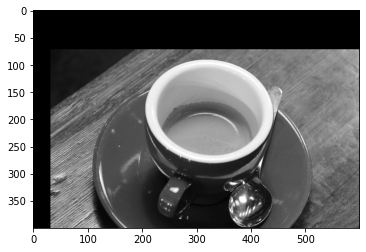

In [ ]:
translated_img = geometric_transformation(gray_image, translate_image)
plt.imshow(translated_img, cmap='gray')


### **Escala**


> A operação de **escala** é bastante comum e pode ser intendida como um **zoom in** ou **zoom out** na imagem, alterando a escala da figura. Sua fórmula é definida por:


*   x’ = Cx * x
*   y’ = Cy * y





In [ ]:
def scale_image(row, column, scale_factor=0.5):
    x = row * scale_factor
    y = column * scale_factor
    return x,y

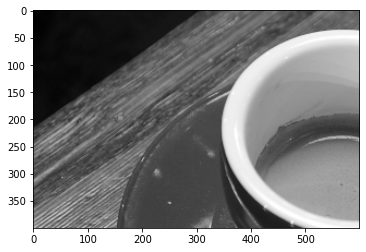

In [ ]:
scaled_img = geometric_transformation(gray_image, scale_image)
plt.imshow(scaled_img, cmap='gray')

### **Rotação**



> A operação de **rotação** consiste em **girar** a figura presente na **imagem** por um determinado número de graus, fazendo com que os pixels sejam mapeados para uma nova coordenada sem gerar distorções. Sua implementação é dada por:


*   x’ = x * cos(θ)- y * sen(θ)
*   y’ = x * sen(θ) + y * cos(θ)






In [ ]:
def rotate_image(row, column, angle=0.2):
    x = row * math.cos(angle) - column * math.sin(angle)
    y = row * math.sin(angle) + column * math.cos(angle) 
    return x,y

In [ ]:
rotated_img = geometric_transformation(gray_image, rotate_image)
plt.imshow(rotated_img, cmap='gray')

### **Cisalhamento**


> O **cisalhamento** consiste em aplicar uma “força” sobre os cantos da imagem, **alterando sua forma para algo parecido com um paralelogramo**. Sua fórmula pode ser definida por:



*   x’ = x + (y * Sx)
*   y’ = (x * Sy) + y





In [ ]:
def shear_image(row, column, shear_v=0.5, shear_h=0):
    x =  row + (column * shear_v)
    y = (row * shear_h) + column
    return x,y

In [ ]:
shear_image = geometric_transformation(gray_image, shear_image)
plt.imshow(shear_image, cmap='gray')

Material baseado no Trabalho de Álvaro Leandro Cavalcante Carneiro Mestrando em Ciência da Computação.